In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
import statsmodels.formula.api as smf
import plotly.figure_factory as ff




import folium
from folium.plugins import HeatMap

In [2]:
data = pd.read_csv('./AB_NYC_2019.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.shape

(48895, 16)

In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Replacing NaN's in reviews per month with median of the values.

In [8]:
data['reviews_per_month'].fillna(data['reviews_per_month'].median(),inplace = True)

Checking if there are any prices which are 0.

In [9]:
(data['price'] == 0).any()

True

Since a price possibly can't have 0, let's replace those
with median values.

In [10]:
data['price'].replace(to_replace=0, value = data['price'].median(), inplace = True)

Checking the count of observations in each borough.

In [11]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Visualizing the spread of data using a countplot to get a better estimate.

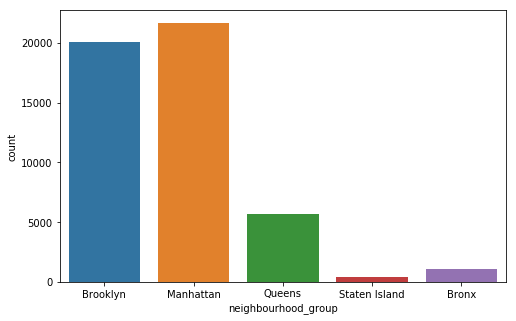

In [12]:
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(data.neighbourhood_group)
plt.show()

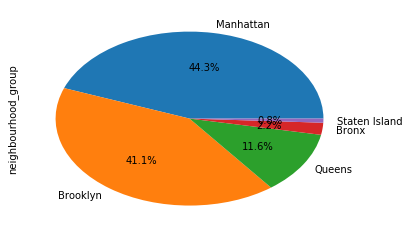

In [13]:
data['neighbourhood_group'].value_counts().plot.pie(autopct='%1.1f%%')

Plotting the points using a scatterplot using longitude and latitudes.

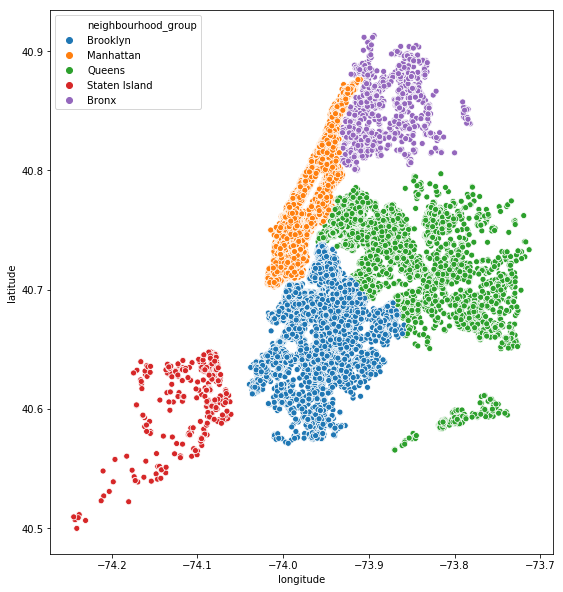

In [14]:
fig,ax = plt.subplots(figsize=(9,10))
ax = sns.scatterplot(x=data.longitude,y=data.latitude, hue=data.neighbourhood_group)
plt.show()

Visualizing the listings on a heat map. Yellow and orange areas have more listings than when compared to blue and purple areas.

In [15]:
map_=folium.Map([40.7128,-74.0060],zoom_start=10)
34.0522, 118.2437
HeatMap(data[['latitude','longitude']].dropna(),radius=8).add_to(map_)
display(map_)

Visualizing the count of different types of rooms.

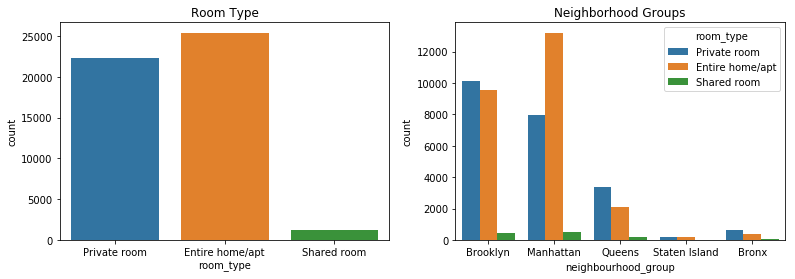

In [16]:
fig = plt.figure(figsize=(13,4))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
fig.add_subplot(121)
p1 = sns.countplot(x='room_type', data=data)
p1.set_title('Room Type')

fig.add_subplot(122)
p2 = sns.countplot(x='neighbourhood_group', data=data, hue='room_type')
p2.set_title('Neighborhood Groups')
plt.show()

Price vs neighbourhood group. We notice that Manhattan has the highest price rates among all.w

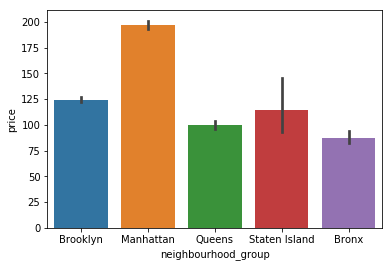

In [17]:
sns.barplot('neighbourhood_group','price',data=data)

Price vs room type. Entire home/ apartment cost the most which makes perfect sense.

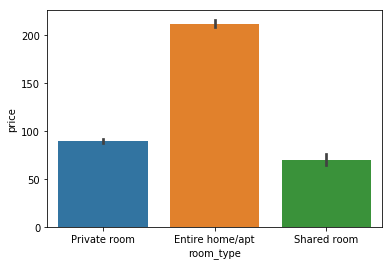

In [18]:
sns.barplot('room_type','price',data=data)

Since we are predicting prices, we need to check if there are any outliers.

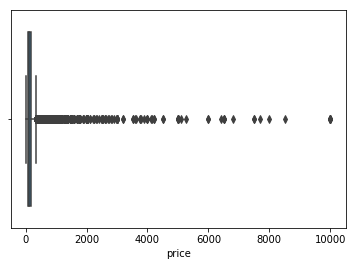

In [19]:
sns.boxplot(x= data['price'])

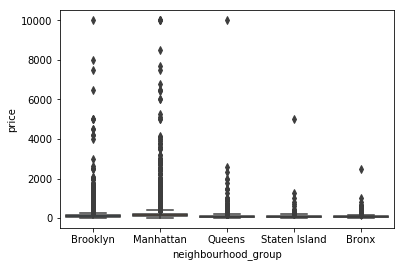

In [20]:
sns.boxplot(x="neighbourhood_group", y="price", data=data)

From the bar plots, we can see there are a lot of outliers. And the outliers start from 500. So let's consider prices less than 500 to get a better estimate of distribution of prices. 

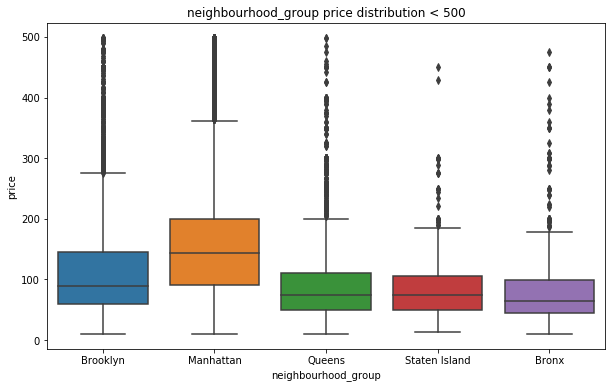

In [21]:
ng = data[data.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

Median of prices of listings in Manhattan is the highest. Next highest is Brooklyn followed by rest three who have approximately the same median and distribution.

Text(0.5,1,'Neighbourhood group vs Price')

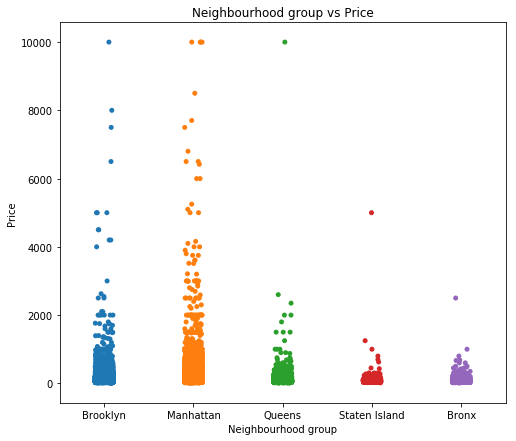

In [22]:
plt.figure(figsize=(8,7))
sns.stripplot(x='neighbourhood_group', y='price', data=data)

plt.xlabel("Neighbourhood group")
plt.ylabel("Price")
plt.title("Neighbourhood group vs Price")

Text(0.5,1,'Density and distribution of prices for each neighborhood_group')

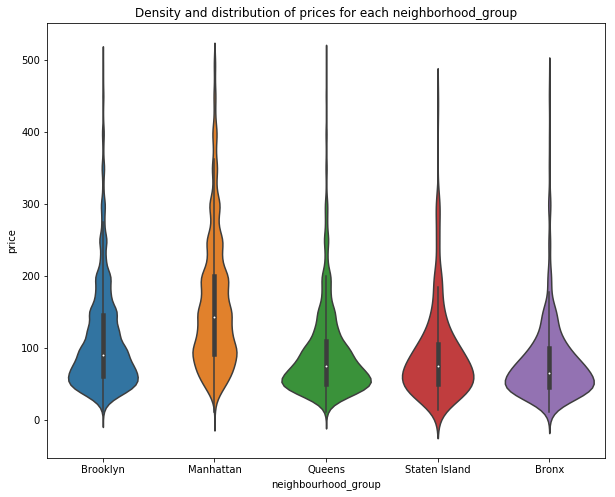

In [23]:
fig,ax=plt.subplots(figsize=(10,8))
sub_df = data[data.price < 500]
plot_2=sns.violinplot(data=sub_df, x='neighbourhood_group', y='price')
plot_2.set_title('Density and distribution of prices for each neighborhood_group')

Text(0.5,1,'Room Type vs Price')

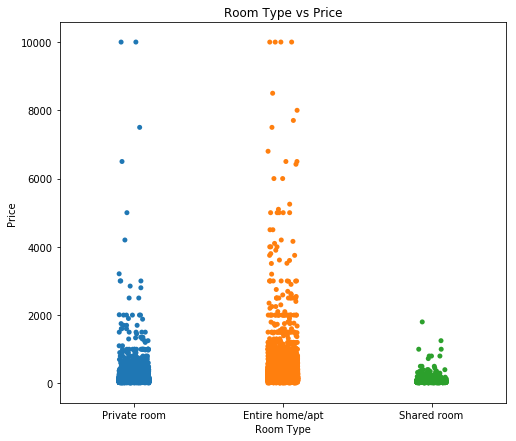

In [24]:
plt.figure(figsize=(8,7))
sns.stripplot(x='room_type', y='price', data=data)

plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs Price")

Let's check out distribution of price.

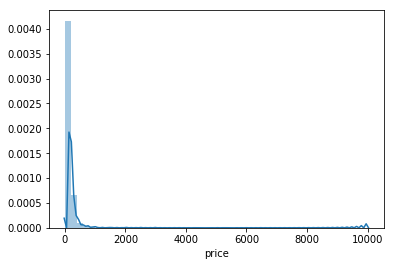

In [25]:
sns.distplot(data['price'])

Price has a highly skewed distribution. This can lead to not a very good model. Let's take log of price to get a more normally distributed data.

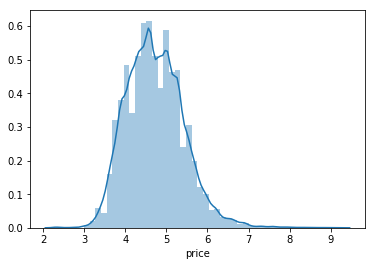

In [26]:
sns.distplot(np.log(data['price']))

Removing outliers from price

In [27]:
data = data[np.log(data['price']) < 8]
data = data[np.log(data['price']) > 3]

In [28]:
data[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','latitude', 'longitude']].corr().style.background_gradient(cmap='RdBu')



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
price,1,0.0385711,-0.0586694,-0.0450454,0.096405,0.108218,0.0506416,-0.217739
minimum_nights,0.0385711,1,-0.0799204,-0.109862,0.128655,0.144407,0.0250988,-0.0622605
number_of_reviews,-0.0586694,-0.0799204,1,0.568143,-0.0725214,0.172724,-0.0155344,0.0587744
reviews_per_month,-0.0450454,-0.109862,0.568143,1,-0.0271755,0.166813,-0.0139259,0.136828
calculated_host_listings_count,0.096405,0.128655,-0.0725214,-0.0271755,1,0.22617,0.0195462,-0.114991
availability_365,0.108218,0.144407,0.172724,0.166813,0.22617,1,-0.0109726,0.0833585
latitude,0.0506416,0.0250988,-0.0155344,-0.0139259,0.0195462,-0.0109726,1,0.0840866
longitude,-0.217739,-0.0622605,0.0587744,0.136828,-0.114991,0.0833585,0.0840866,1


There doesn't appear to exist any strong correlations between price and other variables. So we need not remove/ choose any particular variables.

However, the number of reviews per month is fairly (56%) correlated with the total number of reviews. It can also be
observed that the longitude is anticorrelated with the price. It makes sense because property in the Bronx and in Queens is cheaper than Manhattan and Brooklyn.

In [29]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [30]:
len(data.neighbourhood.unique())

221

In [31]:
data.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9993
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Getting data ready for building model. Dropping columns that do not contribute in predicting.

In [32]:
Y = data['price']

In [33]:
data_regression = data.drop(columns=['id','name','host_id', 'host_name','latitude','longitude','last_review','neighbourhood','price'])
data_c = data.drop(columns=['id','name','host_id', 'host_name','latitude','longitude','last_review','neighbourhood','price'])
data_classification = data.drop(columns=['id','name','host_id', 'host_name','latitude','longitude','last_review','neighbourhood'])

Performing One Hot Encoding on categorical variables

In [34]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')

In [35]:
dataset_regression = columnTransformer.fit_transform(data_regression)
dataset_c = columnTransformer.fit_transform(data_c)

In [36]:
dataset_c.shape

(48762, 13)

The extra columns are added due to performing one hot encoding

In [37]:
x_train, x_test, y_train, y_test = train_test_split(dataset_regression, Y , test_size=0.25, random_state=0)

In [38]:
y_train.shape

(36571,)

Standardizing the data

In [39]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Running LASSO regression to check what variables are more important to predict price

In [40]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(x_train_scaled, y = y_train)
print(fitted_model.coef_)

[-3.2148401   0.         24.66997743 -4.95433923 -1.67808652 52.09908323
 -0.         -3.21243212 -3.04778681 -9.20103215 -0.62121904 -0.
 19.395896  ]


All variables are dropped! Makes sense. In correlation matrix, none of the variables had a strong relationship with price.

# LINEAR REGRESSION

Problem Statement: Given different information of a listing on AirBnb, predict its price.

Building linear regression model.
Since none of the parameters have a strong relationship with price, we keep all the variables to predict the price.

In [41]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled, y = y_train)
predicted = fitted_model.predict(x_test_scaled)

mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
r2 = metrics.r2_score(y_test, predicted)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 64.17530512311227
MSE (Mean Squared Error): 17542.963923317493
RMSE (Root mean squared error): 132.4498543725794
R2 score: 0.2048631976208708


R^2 value is 0.2048. Pretty less I would say, but makes perfect sense since none of the variables are highly correlated with price. So even collectively they aren't doing a good job of predicting the price.

# CLASSIFICATION

Problem Statement: Given different information of a listing on AirBnb ( but not its price), classify the listing as affordable and non affordable.

 Considering all the listings whose price comes in less than 75th percentile as affordable. Removing outliers.

In [42]:
data_classification_wo_outliers = data_classification[data_classification.price < 500]
affordable_rates = data_classification.groupby("neighbourhood_group").price.describe()['75%']
print(affordable_rates)

neighbourhood_group
Bronx             99.0
Brooklyn         150.0
Manhattan        220.0
Queens           110.0
Staten Island    110.0
Name: 75%, dtype: float64


Creating a column called affordability which is true(1) if the price of the listing is in 75th percentile of prices of that neighborhood.

In [43]:
data_classification['affordability'] = (data_classification.price < affordable_rates[data_classification.neighbourhood_group].values).astype('int')

In [44]:
Y = data_classification['affordability']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(dataset_c, Y , test_size=0.25, random_state=0)

Standardizing the data

In [46]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Using Support Vector Machines with rbf kernel to train the model

[0.7768025592650316, 0.2231974407349684, 0.7544517826454673, 0.7768025592650316, 0.752635028710549]


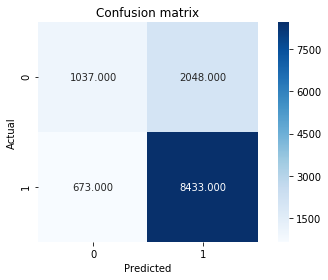

In [47]:
classifier = SVC(kernel = 'rbf') 
classifier.fit(x_train_scaled, y_train)
y_pred = classifier.predict(x_test_scaled)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = "weighted")
recall = metrics.recall_score(y_test, y_pred, average = "weighted")
F1_score = metrics.f1_score(y_test, y_pred, average = "weighted")
print([accuracy, error, precision, recall, F1_score])

Weighted F1 score is around 75% which isn't a good score. 

# Results and conclusions

As seen in the correlation matrix and from our linear regression and classification model, none of the predictor variables are highly correlated with price enough to predict it accurately.

We get an R^2 value of 0.2048 and F1 score of 0.75 which show the bad performance of the model.